#  REAL ESTATE

![](http://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRAFBXDVOYkrh5SRy3u__lqWujfgKk0PT_hA&usqp=CAU)



# Modul 1- Kasus No 2

Diskusi : kebutuhan tempat tinggal bagi warga perkotaan.

Pertanyaan:
<ol>
    <li>Load dataset yang diberikan ke komputer</li>
    <li>Kelompokan atribut data tersebut ke dalam kelompok  Target dan Prediktor</li>
    <li>Lakukan pembersihan data jika diperlukan: missing value, outlier, inconsistent data, dll</li>
</ol>
    


## Mengimport Pustaka (Libraries)

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input/Real estate.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Menyiapkan Dataset

In [59]:
df = pd.read_csv("/kaggle/input/real-estate-price-prediction/Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [60]:
df.shape

(414, 8)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### hasil view data dengan fungsi head :
semua kolom berupa angka
<ul>
    <li>kolom 1 berupa tanggal transaksi (tanggal berpengaruh terhadap harga, dimana ada kecenderungan biaya sewa yg meningkat tahun ke tahun)</li>
    <li>kolom 2 usia hunian (semakin baru usia hunian mungkin harganya makin mahal)</li>
    <li>kolom 3 jarak dari stasiun MRT</li>
    <li>kolom 4 jumlah toko kebutuhan/kelontong</li>
    <li>kolom 5 dan 6 latitude longitude</li>
    <li>kolom 7 harga per unit</li>
    <li>kolom prediktor : 1 sd 5</li>
    <li> kolom target: kolom 6</li>
</ul>

proses penyiapan data:
1. data tanggal (X1 transaction date) bisa diambil hanya bagian tahunnya saja kemudian dihitung berapa lama dari tahun sekarang dan tipenya date bukan float
2. data usia hunian (X2 house age) seharusnya numerik dan disimpan tipenya sebagai float
3. data jarak ke stasiun MRT (X3 distance to the nearest MRT station) seharusnya bertipe numerik dan disimpan sebagai float
4. kolom latitude (X5 latitude) dan langitude(X6 longitude) seharusnya bertipe numerik dan disimpan sebagai float
5. kolom harga perunit (Y house price of unit area) bertipe numerik dan disimpan sebagai float
untuk melakukan pengecekan tipe data dapat dilakukan dengan fungsi pandas.DataFrame.info()

<ul>
   <li>dari fungsi .info() diketahui jumlah baris data ada 414 dan jumlah data bertipe non-null pada semua kolom ada 414</li>
   <li>perbaikan yang perlu dilakukan untuk memperbaiki representasi data adalah mengubah data tanggal</li>
data tanggal seharusnya bertipe date tetapi disimpan sebagai float64. untuk mengambil bagian tahunnya saja bisa dilakukan dengan fungsi pandas astype dengan parameter inputnya int (integer)
    <li> perlu dilakukan perubahan nama kolom sehingga memudahkan akses ke kolom</li>
    <li> kolom No dijadikan index</li>

In [62]:
#mengubah representasi tanggal dalam float menjadi integer untuk mengambil bagian tahunnya saja
df['X1 transaction date']=df['X1 transaction date'].astype(int)
# df.transaction_date = df.transaction_date.astype(int)

In [63]:
#cek dengan fungsi pandas.DataFrame.head()
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [64]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

untuk memudahkan pengaksesan nama kolom pada dataset, perlu dilakukan update nama kolom menjadi tidak mengandung spasi kosong
<ul>
    <li>'X1 transaction date' ==> "transaction_date"</li>
    <li>'X2 house age'==> "house_age"</li>
    <li>'X3 distance to the nearest MRT station',==> "dist_to_MRT"</li>
    <li>'X4 number of convenience stores'==> "conv_store"</li>
    <li>'X5 latitude'==> "lat" </li>
    <li>'X6 longitude'==> "long"</li>
    <li>'Y house price of unit area'==> "house_price"</li>
</ul>


In [65]:
# ubah nama kolom menjadi lebih sederhana untuk memudahkan cara akses
new_names =["No","transaction_date","house_age","dist_to_MRT","conv_store","lat","long","house_price"]
df = df.set_axis(new_names, axis="columns")

In [66]:
df.set_index("No")

,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013,18.8,390.96960,7,24.97923,121.53986,40.6


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                414 non-null    int64  
 1   transaction_date  414 non-null    int64  
 2   house_age         414 non-null    float64
 3   dist_to_MRT       414 non-null    float64
 4   conv_store        414 non-null    int64  
 5   lat               414 non-null    float64
 6   long              414 non-null    float64
 7   house_price       414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [68]:
#cek jumlah nilai unik pada setiap kolom
print(df.nunique())

No                  414
transaction_date      2
house_age           236
dist_to_MRT         259
conv_store           11
lat                 234
long                232
house_price         270
dtype: int64


In [69]:
# cek dan menghapus  duplikasi
dups=df.duplicated()
print(dups.any())

False


Beberapa hal yang perlu dilakukan dalam proses EDA:
<ul>
    <li> cek statistik deskriptif mean, median max, min, max</li>
    <li> cek ada atau tidaknya outlier menggunakan box plot</li>
    </ul>
    
Interpretasi Box Plot:
<ul>
<li>Kotak (Box): Kotak pada box plot menggambarkan rentang interkuartil (IQR), yang merupakan jarak antara kuartil ketiga (Q3) dan kuartil pertama (Q1) dari data. Nilai-nilai dalam IQR ini berada di dalam kotak.</li>

<li> Garis Tengah di dalam Kotak (Median): Garis ini mewakili nilai tengah atau median dari data.</li>

<li>Tanduk Atas (Upper Whisker): Tanduk atas box plot (garis atas yang menghubungkan kotak ke titik-titik di atasnya) menunjukkan nilai maksimum yang masih dianggap sebagai nilai biasa (non-outlier) dalam data.</li>

<li>Tanduk Bawah (Lower Whisker): Tanduk bawah box plot (garis bawah yang menghubungkan kotak ke titik-titik di bawahnya) menunjukkan nilai minimum yang masih dianggap sebagai nilai biasa (non-outlier) dalam data.</li>

<li>Titik-Titik di Luar Whisker (Outliers): Titik-titik di luar tanduk atas dan tanduk bawah adalah indikasi outlier dalam data. Outlier adalah nilai-nilai yang secara signifikan berbeda dari sebagian besar data dan dapat menjadi sumber ketidakpastian dalam analisis statistik.</li>
</ul>

![image.png](attachment:da83d6fb-f7e5-4f08-a6cf-22fd348238b5.png)

In [70]:
# fungsi describe hanya untuk tipe data numerik
df.describe()

,No,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


hasil pemanggilan fungsi describe dapat digunakan untuk mengidentifikasi sebaran nilai pada setiap kolom

In [71]:
df.columns

Index(['No', 'transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long', 'house_price'],
      dtype='object')

Selanjutnya adalah identifikasi outlier dengan boxplot. untuk memberikan hasil visualisasi yang terbaca, nilai min dan max pada setiap kolom perlu diperhatikan jika ingin menampilkan beberapa boxplot secara bersamaan

<Axes: >

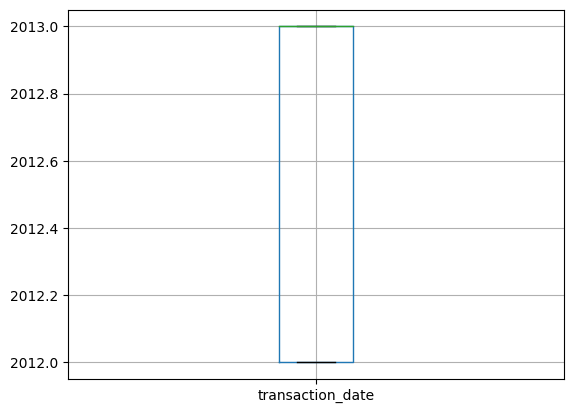

In [72]:
# proses satu satu setiap kolom
df.boxplot(column=['transaction_date'])

<Axes: >

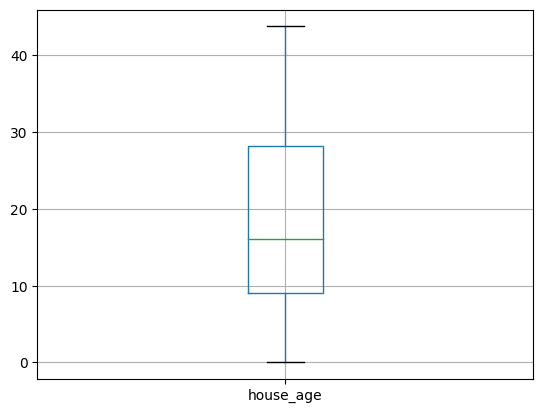

In [73]:
# 'house_age', 'dist_to_MRT', 'conv_store', 'lat', 'long', 'house_price'
df.boxplot(column=['house_age'])

<Axes: >

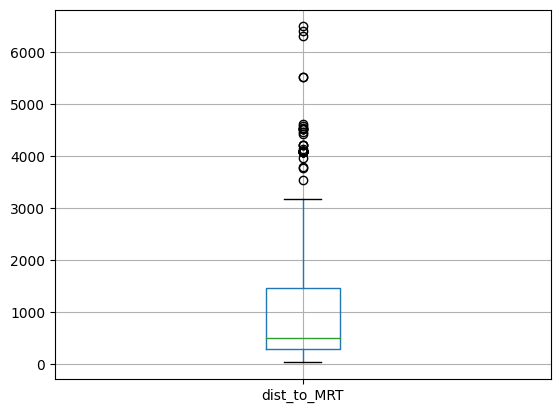

In [74]:
df.boxplot(column=['dist_to_MRT'])

<Axes: >

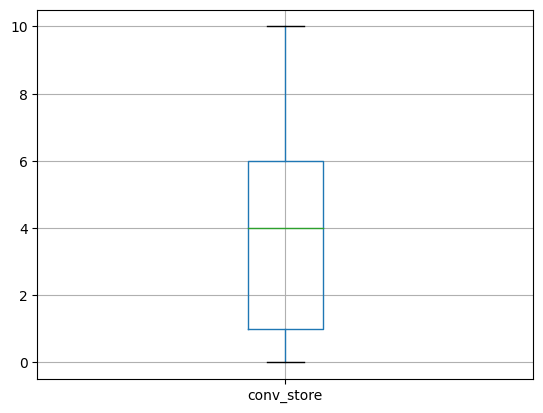

In [75]:
df.boxplot(column=['conv_store'])

<Axes: >

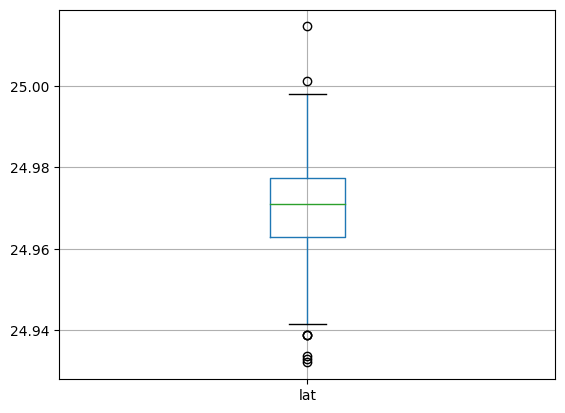

In [76]:
df.boxplot(column=['lat'])

<Axes: >

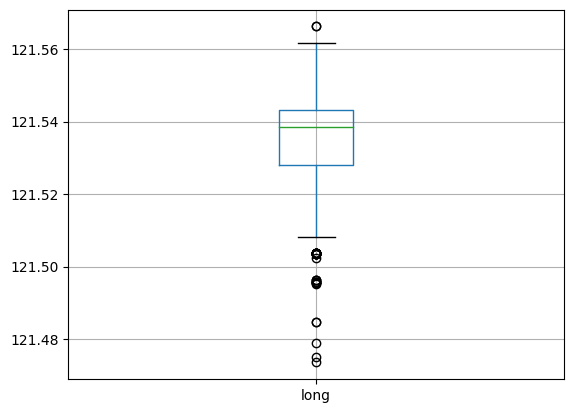

In [77]:
df.boxplot(column=['long'])

<Axes: >

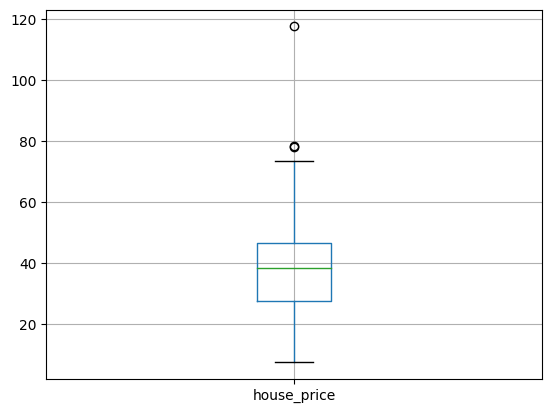

In [78]:
df.boxplot(column=['house_price'])

In [79]:
# import matplotlib.pyplot as plt
# column_for_boxplot =['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
#        'lat', 'long', 'house_price']
# for col in column_for_boxplot:
#     plt.figure()
#     df.boxplot(column=[col])

 Kolom 'dist_to_MRT', 'lat', 'long' dan 'house_price' mengandung titik titik diluar Whisker yang menunjukkan kemungkinan adanya outlier.
 Untuk identifikasi lebih lanjut keberadaan outlier bisa digunakan IQR.
 berdasarkan metode Interquartile range (IQR), outlier adalah nilai yang lebih besar dari  Q3 + 1.5 * IQR atau kurang dari Q1 – 1.5 * IQR.

In [80]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_5 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
print(df_5.shape)

(414, 8)
(371, 8)


In [81]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 413
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                371 non-null    int64  
 1   transaction_date  371 non-null    int64  
 2   house_age         371 non-null    float64
 3   dist_to_MRT       371 non-null    float64
 4   conv_store        371 non-null    int64  
 5   lat               371 non-null    float64
 6   long              371 non-null    float64
 7   house_price       371 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.1 KB


In [82]:
# deteksi apakah pada kolom mengandung outlier, jika ya maka drop data
# lakukan pada kolom 'dist_to_MRT'
Q1 = df.dist_to_MRT.quantile(0.25)
Q3 = df.dist_to_MRT.quantile(0.75)
IQR = Q3 - Q1
df_1 = df[~((df.dist_to_MRT < (Q1 - 1.5 * IQR)) | (df.dist_to_MRT > (Q3 + 1.5 * IQR)))] # df['dist_to_MRT']
print(df.shape)
print(df_1.shape)

(414, 8)
(377, 8)


In [83]:
# deteksi apakah pada kolom mengandung outlier, jika ya maka drop data
# lakukan pada kolom 'lat'
Q1 = df_1.lat.quantile(0.25)
Q3 = df_1.lat.quantile(0.75)
IQR = Q3 - Q1
df_2 = df_1[~((df_1.lat < (Q1 - 1.5 * IQR)) | (df_1.lat > (Q3 + 1.5 * IQR)))]
print(df_1.shape)
print(df_2.shape)

(377, 8)
(376, 8)


In [84]:
# deteksi apakah pada kolom mengandung outlier, jika ya maka drop data
#lakukan pada kolom 'long'
Q1 = df_2.long.quantile(0.25)
Q3 = df_2.long.quantile(0.75)
IQR = Q3 - Q1
df_3 = df_2[~((df_2.long < (Q1 - 1.5 * IQR)) | (df_2.long > (Q3 + 1.5 * IQR)))]
print(df_2.shape)
print(df_3.shape)

(376, 8)
(315, 8)


In [85]:
# deteksi apakah pada kolom mengandung outlier, jika ya maka drop data
#lakukan pada kolom 'house_price'
Q1 = df_3.house_price.quantile(0.25)
Q3 = df_3.house_price.quantile(0.75)
IQR = Q3 - Q1
df_4 = df_3[~((df_3.house_price < (Q1 - 1.5 * IQR)) | (df_3.house_price > (Q3 + 1.5 * IQR)))]
print(df_3.shape)
print(df_4.shape)


(315, 8)
(303, 8)


# bagian ini di remove dari modul

In [86]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# cols = [ 'dist_to_MRT','lat', 'long', 'house_price']
# for col in cols:
#     plt.figure(figsize = (10, 5))
#     sns.boxplot(df[col], orient="h")
#     plt.axvline(df[col].describe()['25%'], color = 'red', label = 'Q1')
#     plt.axvline(df[col].describe()['50%'], color = 'yellow', label = 'Q2')
#     plt.axvline(df[col].describe()['75%'], color = 'blue', label = 'Q3')
#     plt.annotate('Outlier', xy=(df[col].describe()['max'],0.1), xytext = (df[col].describe()['max'],0.3),
#              arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
#     IQR = df[col].describe()['75%'] - df[col].describe()['25%']
#     plt.annotate('Batas Atas', (df[col].describe()['75%'] + 1.5*IQR, 0.2),
#              xytext = (df[col].describe()['75%'] + 1.5*IQR, 0.4),
#              arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
#     plt.annotate('Batas Bawah', (df[col].describe()['25%']- 1.5*IQR, 0.2),
#              xytext = (df[col].describe()['25%']-1.5*IQR, 0.4),
#              arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
#     plt.legend()

Cek prasyarat untuk menerapkan regresi linear:
Model yang dibangun dengan regresi linear selain diuji berdasarkan akurasi, perlu dilakukan uji-uji berikut
1. cek linearitas
2. rerata residual
3. cek Homoscedasticity
4. cek normalitas dari error terms/residual
5. tidak ada autocorrelation of residuals
6. tidak mengandung perfect multicollinearity
diantara uji uji diatas, cek linearitas dan multicollinearitas dapat diterapkan sebelum membangun model, sedangkan uji-uji lainnya dilakukan setelah model dibangun untuk memastikan syarat-syarat tersebut terpenuhi.


Ada beberapa metode untuk menurunkan efek outlier pada data:
Outlier dapat dihapus menggunakan kriteria z score atau IQR.
Pada kali ini digunakan IQR


In [87]:
df.columns

Index(['No', 'transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long', 'house_price'],
      dtype='object')

### Cek Linearitas menggunakan scatterplot

scatterplot merupakan grafik yang digunakan untuk menyatakan pola hubungan antara dua variabel. pada kasus regresi linear sederhana, variabel x untuk prediktor dan variabel y untuk target.

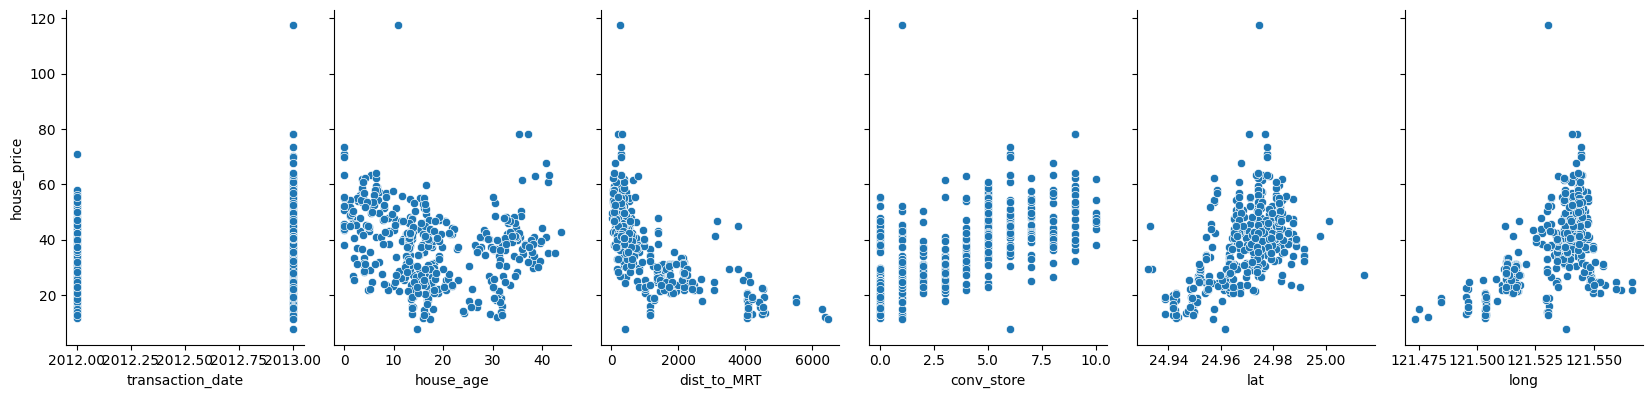

In [88]:
# menggunakan scatterplots untuk cek hubungan linier antara house price dengan kolom lainnya
p = sns.pairplot(df, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', height=4, aspect=0.7)

data transacion_date perlu di ubah menjadi tahun atau current date - tahun transaksi

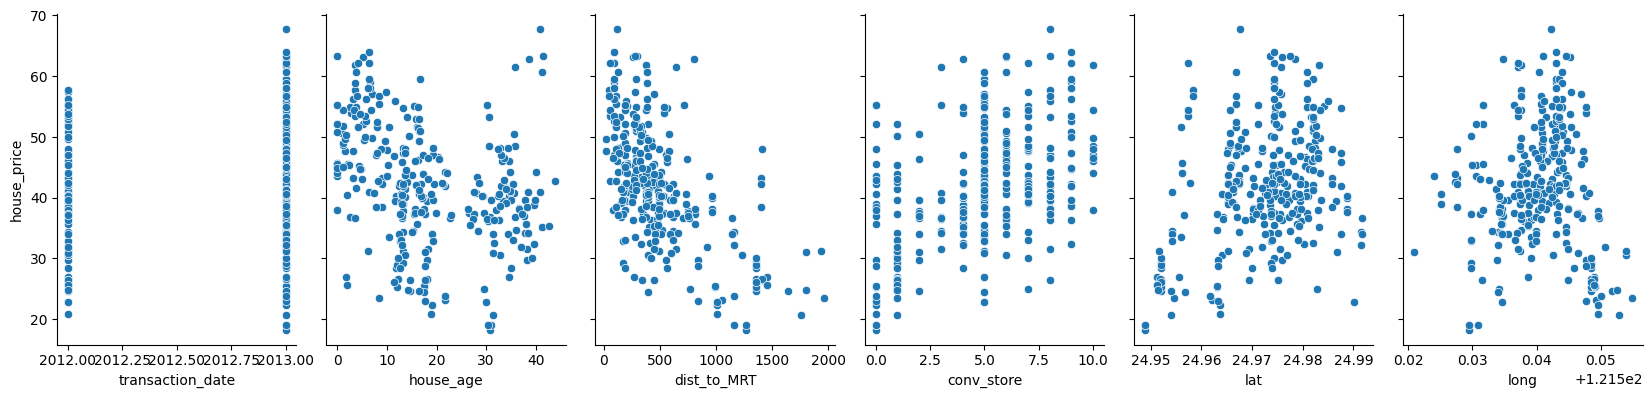

In [89]:
#cek data setelah dikeluarkan outliernya
p = sns.pairplot(df_4, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', height=4, aspect=0.7)

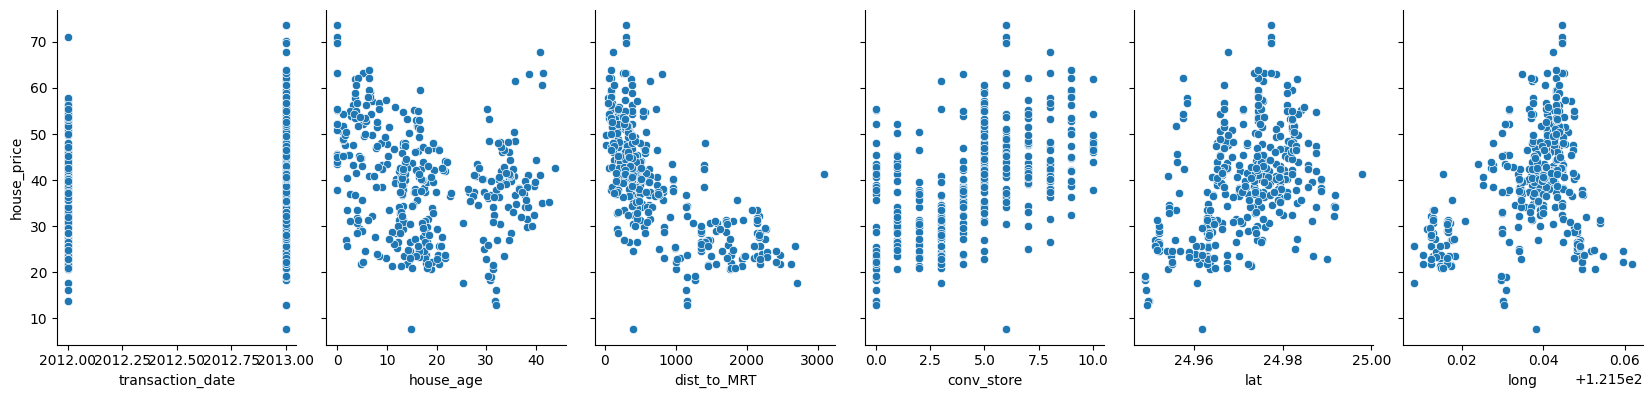

In [90]:
p = sns.pairplot(df_5, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', height=4, aspect=0.7)

In [91]:
df_model_house_age_l_20 = df[df['house_age'] < 20]
df_model_house_age_m_20 = df[df['house_age'] > 20]

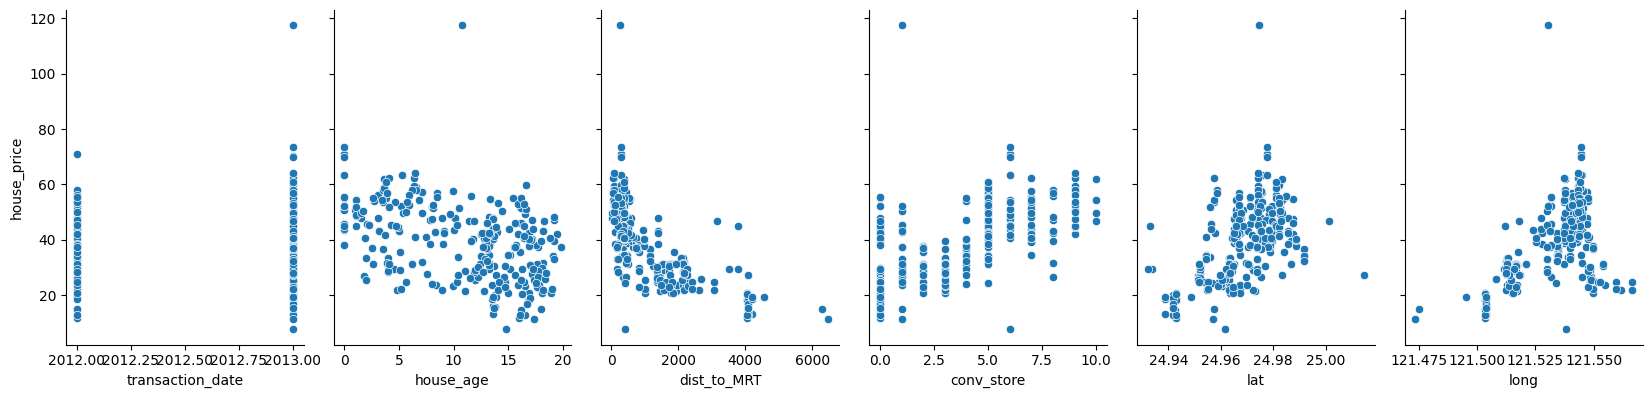

In [92]:
p = sns.pairplot(df_model_house_age_l_20, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', height=4, aspect=0.7)

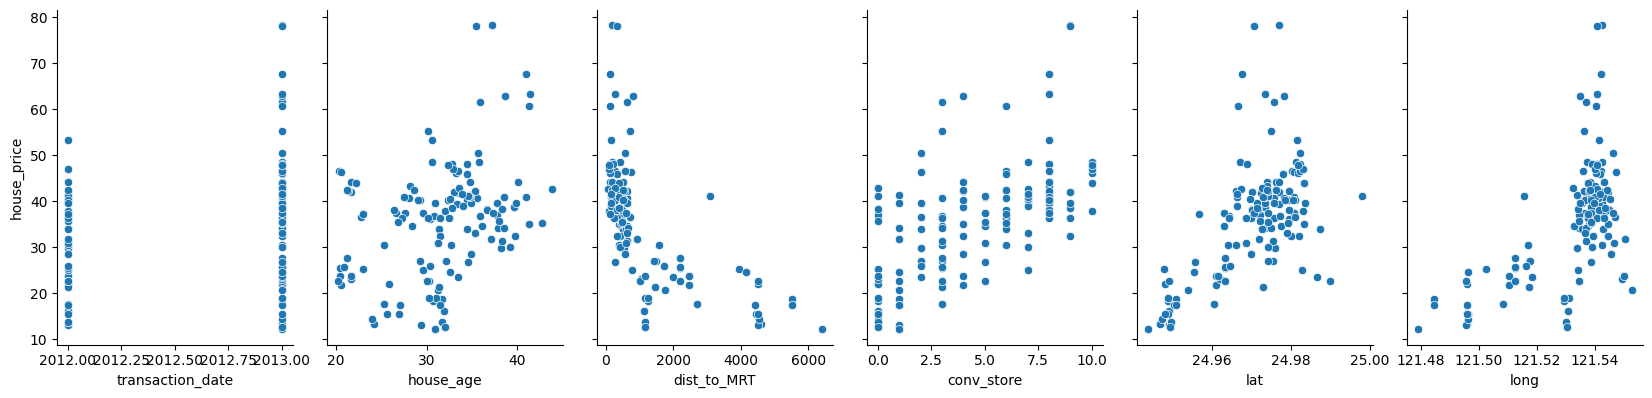

In [93]:
p = sns.pairplot(df_model_house_age_m_20, x_vars=['transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long'], y_vars= 'house_price', height=4, aspect=0.7)

<Axes: >

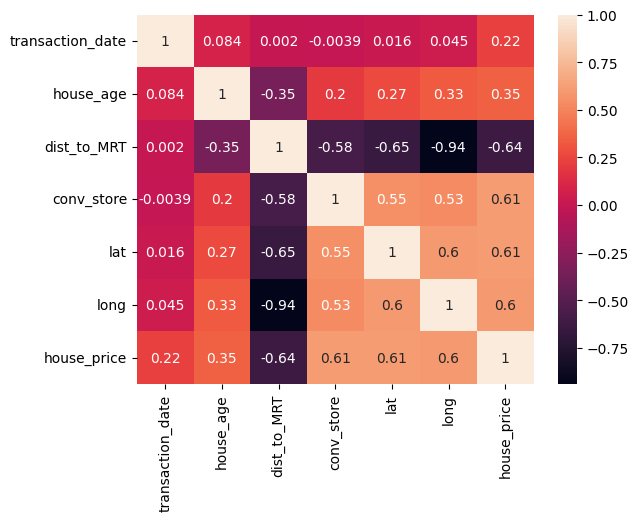

In [94]:
sns.heatmap(df_model_house_age_m_20.drop(columns=['No']).corr(), annot= True)

Lakukan pengamatan terhadap pola hubungan antara setiap variabel prediktor dan variabel target. Meskipun tidak ada yang secara jelas menyatakan hubungan linear dengan variabel target, setidaknya var conv_store menunjukkan adanya hubungan itu.

/tmp/ipykernel_36/214427742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['trans_dist_to_mrt'] =  np.log(df_4.dist_to_MRT.copy())


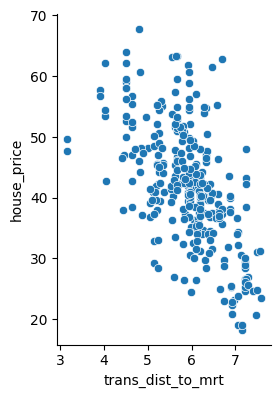

In [95]:
import numpy as np
df_4['trans_dist_to_mrt'] =  np.log(df_4.dist_to_MRT.copy())

p = sns.pairplot(df_4, x_vars=['trans_dist_to_mrt'], y_vars= 'house_price', height=4, aspect=0.7)

hasil transformasi ini bisa digunakan untuk membangun model secara bertahap. di cek kinerja model dengan fitur ke-1 dan fitur ke-2.

## Pengecekan nilai korelasi antar prediktor dan antara prediktor dengan target

Terdapat beberapa metode yang dapat digunakan untuk mengukur korelasi antara variabel numerik dengan numerik dan korelasi antara variabel kategorik ke numerik. Berikut adalah beberapa metode yang umum digunakan:

**1. Korelasi Pearson (untuk variabel numerik dengan numerik):**
Korelasi Pearson mengukur hubungan linier antara dua variabel numerik. Rentang nilai korelasinya adalah dari -1 hingga 1. Nilai 1 menunjukkan korelasi positif sempurna, nilai -1 menunjukkan korelasi negatif sempurna, dan nilai 0 menunjukkan tidak adanya korelasi linier antara variabel tersebut.

**2. Korelasi Spearman (untuk variabel numerik dengan numerik):**
Korelasi Spearman mengukur hubungan monotonik (naik atau turun) antara dua variabel numerik. Ini cocok digunakan ketika hubungan antara variabel tidak berbentuk linier. Seperti Korelasi Pearson, rentang nilai korelasinya adalah dari -1 hingga 1.

**3. Korelasi Kendall (untuk variabel numerik dengan numerik):**
Korelasi Kendall juga digunakan untuk mengukur hubungan monotonik antara dua variabel numerik. Ini mengukur tingkat kesepakatan antara perbandingan pasangan nilai variabel.

**4. Anova atau Uji Kruskal-Wallis (untuk variabel kategorik ke numerik):**
Jika Anda ingin mengukur korelasi antara variabel kategorik (grup) dengan variabel numerik, Anda dapat menggunakan analisis varian (Anova) jika asumsi distribusi normal terpenuhi. Namun, jika distribusi tidak normal, Anda dapat menggunakan Uji Kruskal-Wallis sebagai alternatif.

**5. Analisis Regresi (untuk variabel kategorik ke numerik):**
Anda juga dapat menggunakan analisis regresi, di mana variabel kategorik diwakili oleh variabel dummy atau variabel kategorik dengan nilai-nilai numerik. Ini akan membantu Anda memahami bagaimana variabel kategorik mempengaruhi variabel numerik.


In [96]:
df.corr()

,No,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
No,1.000000,0.007379,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
transaction_date,0.007379,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
house_age,-0.032808,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
dist_to_MRT,-0.013573,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
conv_store,-0.012699,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
lat,-0.010110,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
long,-0.011059,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,-0.028587,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [97]:
df.shape

(414, 8)

## Pengecekan Nilai Null

</br>
nilai null menyebabkan algoritma tidak bisa dijalankan. Oleh sebab itu perlu dipastikan dulu tidak ada nilai Null pada dataset

In [98]:
df.isnull().sum()

No                  0
transaction_date    0
house_age           0
dist_to_MRT         0
conv_store          0
lat                 0
long                0
house_price         0
dtype: int64

## Korelasi dengan HeatMap
</br>
Heatmap memvisualisasikan nilai korelasi antar variabel dengan grafik sehingga memungkinkan kita untuk mudah mengidentifikasi variabel yang berkorelasi dengan lebih mudah.

<Axes: >

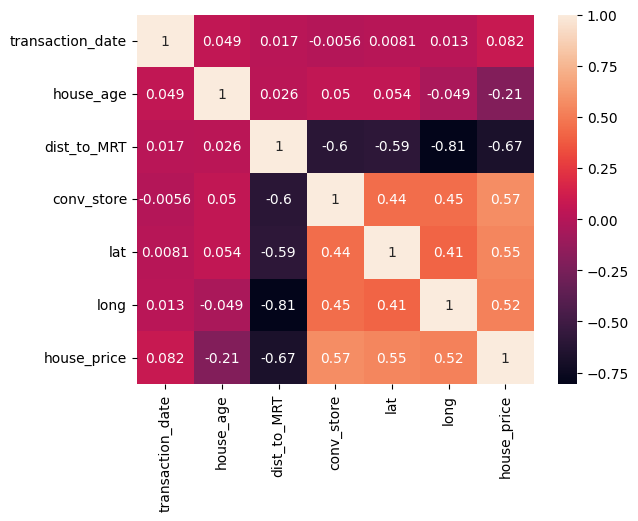

In [99]:
sns.heatmap(df.drop(columns=['No']).corr(), annot= True)

<Axes: >

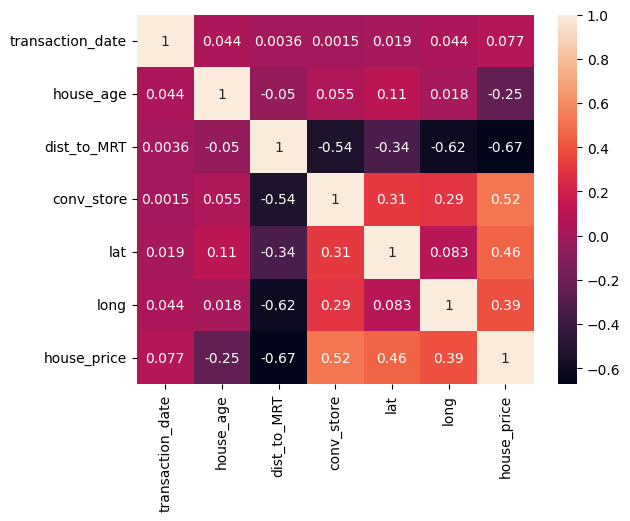

In [100]:
sns.heatmap(df_5.drop(columns=['No']).corr(), annot= True)

perlu diperhitungkan juga kondisi multicollinearity sehingga dianatara trans_dist_to_mrt, long, dan conv store bisa dipilih salah satu yang nilai korelasinya paling tinggi (perlu dicek batas minimal nilai korelasinya)

## Menentukan kolom prediktor (independent) dan kolom target (dependent)

In [101]:
# X variabel prediktor, y variabel target
# X = np.array(df_model_house_age_l_20['house_age']).reshape(-1, 1) # diambil dari kolom pertama sampai kolom sebelum kolom terakhir
# y = df_model_house_age_l_20['house_price'] # diambil dari kolom terakhir

untuk X dipilih yang nilai korelsinya paling tinggi

In [102]:
from sklearn.model_selection import train_test_split
X = df.drop(['house_price'],axis=1) # data fitur/prediktor
y = df.house_price # target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [103]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit (X_train, y_train)

LinearRegression()

In [104]:
reg.coef_

array([-5.30413265e-03,  2.68096447e+00, -2.66453987e-01, -4.40560439e-03,
        1.11189597e+00,  2.33291255e+02, -1.39919126e+01])

In [105]:
y_pred = reg.predict(X_test)
y_pred

array([38.98583161, 13.104198  , 41.74054363, 12.06317213, 40.91304714,
       40.23775488, 41.00955577, 35.90941863, 49.80659265, 44.9922497 ,
       45.50474025, 42.4516471 , 38.14279633, 41.09032116, 46.07379506,
       37.37687329, 40.38034933, 41.01129854, 41.09404069, 41.71922144,
       49.56787771, 32.424555  , 38.41063178, 47.47261579, 45.78450396,
       42.23371425, 45.80987366, 26.54279937, 47.57416869, 20.42347795,
       42.8460876 , 33.56409693, 43.00413941, 37.89257859, 42.88023863,
       30.68985415, 47.8967069 , 40.19216462, 52.73414137,  7.51269689,
       51.22572211, 33.00475213, 33.41570795, 47.85450594, 14.86139178,
       43.82643854, 42.5369668 , 12.28884439, 34.34518906, 46.82947542,
       51.65908557, 40.36405957, 48.199612  , 24.92946369, 31.88365821,
       33.32607904, 48.45566043, 41.68045411, 43.35999212, 33.56459588,
       43.02618827, 43.76211504, 40.83283534, 46.73917491, 37.60934539,
       30.96462021, 11.25570729, 34.46751544, 47.7062734 , 41.72

In [106]:
from sklearn.metrics import r2_score
print('r2 Score : ', r2_score(y_test, y_pred))

r2 Score :  0.6589431008263702


In [107]:
df_4.columns

Index(['No', 'transaction_date', 'house_age', 'dist_to_MRT', 'conv_store',
       'lat', 'long', 'house_price', 'trans_dist_to_mrt'],
      dtype='object')

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_1 = df_4.drop(['No', 'transaction_date','lat', 'long','trans_dist_to_mrt', 'house_price'],axis=1)
X_2 = df_4.drop(['No', 'transaction_date','lat', 'long','dist_to_MRT', 'house_price'],axis=1)
y = df_4.house_price

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y, test_size = 0.05,random_state = 0)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y, test_size = 0.05,random_state = 0)

reg_1 = LinearRegression()
reg_1.fit (X_1_train, y_1_train)
reg_2 = LinearRegression()
reg_2.fit (X_2_train, y_2_train)

print(f'reg_1.coef_{reg_1.coef_}')
y_1_pred = reg_1.predict(X_1_test)
print('r2 Score model reg_1 : ', r2_score(y_1_test, y_1_pred))

print(f'reg_2.coef_{reg_1.coef_}')
y_2_pred = reg_2.predict(X_2_test)
print('r2 Score model reg_2 : ', r2_score(y_2_test, y_2_pred))

reg_1.coef_[-0.26514379 -0.01302213  0.63801432]
r2 Score model reg_1 :  -0.3217054670800772
reg_2.coef_[-0.26514379 -0.01302213  0.63801432]
r2 Score model reg_2 :  -0.30713646140040596


skor R2 tidak boleh negatif.R2 negatif menyatakan ba ref : https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

array([<Axes: title={'center': 'dist_to_MRT'}>,
       <Axes: title={'center': 'house_price'}>,
       <Axes: title={'center': 'trans_dist_to_mrt'}>], dtype=object)

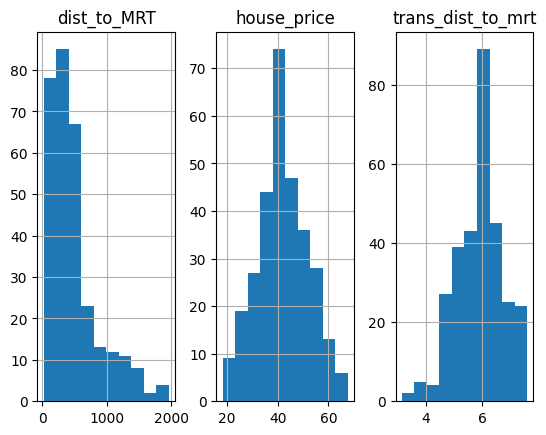

In [109]:
fig, axes = plt.subplots(1, 3)

df_4[['dist_to_MRT','house_price','trans_dist_to_mrt']].hist(ax = axes)

<Axes: xlabel='trans_dist_to_mrt', ylabel='house_price'>

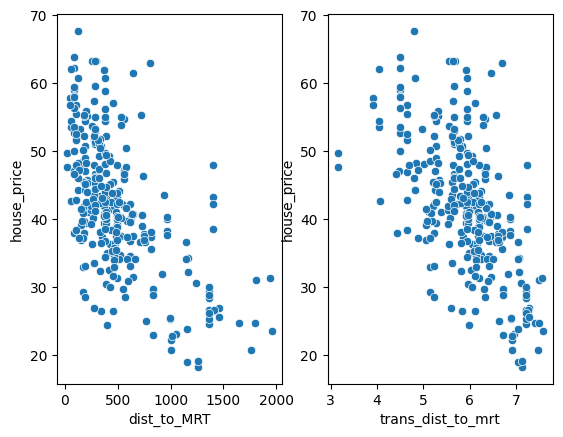

In [110]:
fig, axes = plt.subplots(1, 2)

sns.scatterplot(data=df_4, x='dist_to_MRT', y= 'house_price', ax=axes[0])
sns.scatterplot(data=df_4, x='trans_dist_to_mrt', y= 'house_price', ax=axes[1])

<Axes: xlabel='trans_dist_to_mrt', ylabel='house_price'>

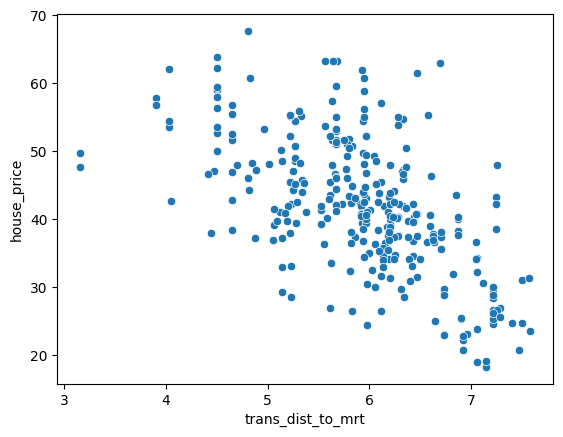

In [111]:
sns.scatterplot(data = df_4, x='trans_dist_to_mrt', y= 'house_price')

# Visualizing Training DataSet Result

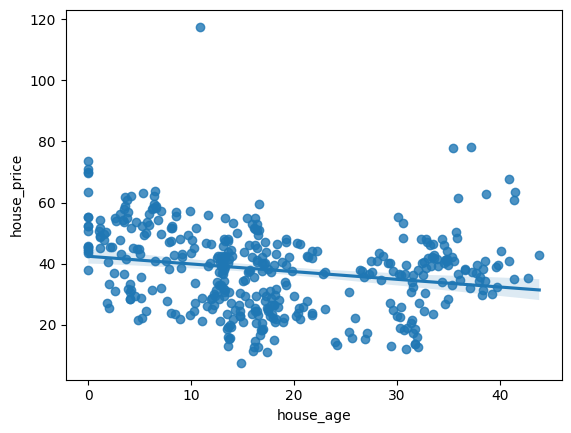

In [112]:
sns.regplot(x="house_age", y="house_price", data=df);

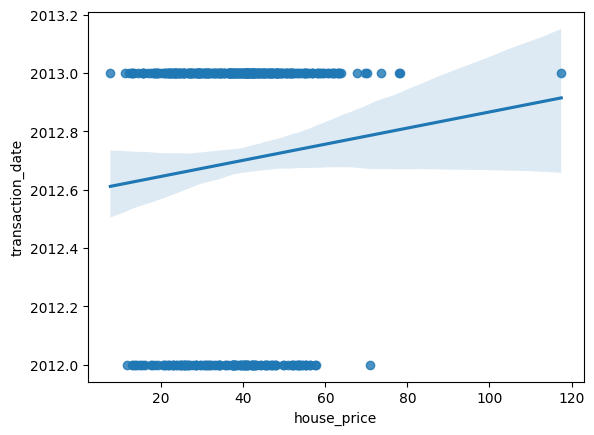

In [113]:
sns.regplot(y="transaction_date", x="house_price", data=df);

Referensi EDA untuk regresi linear:
Step by step pengujiannya ada di contoh ini, kemudian dicoba diterapkan di kasus yang dibuat https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression
